In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-48.56231478468375 55.112727434834625
-45.476059762977904 6.133521456004701
69.59508177144866 -4.819057923745476
-71.46046147211739 -144.86389324854045
-31.303952043622033 78.60335575163799
85.40212200307525 -179.0349464183281
-82.7163420392113 22.605641512004013
81.4520080353829 -22.436336786153078
47.33024021637979 -101.96681687453435
74.1077845828213 166.3276840866548
-39.60187398639512 99.01219726860558
50.56390496224415 -5.280872684425333
47.71924238072856 -69.35564723212534
19.97761772204963 -168.69870825192132
54.13833002435885 -36.64404349706521
-38.91948274231327 125.28028175532177
-52.84704488756531 147.84322382583179
-35.801020688829816 -63.643482185875826
47.86753224799901 9.34121715642138
-89.26949373841452 -154.8314346810575
88.58011678873638 -20.93326544862046
81.76274602482184 -86.78897024282631
64.06915618319769 129.4284405666392
-7.422303767618175 -94.47242309052957
30.48835358735704 -77.82982332232427
18.51556215348002 -100.13139332141718
-73.48696680934091 57.078594

44.65150021593675 -37.503017355043966
-3.8154145048905406 54.19965772575608
-58.23010727819609 1.9871402839494579
-69.89829799534397 -7.692568422548476
11.680442492968368 -157.77503410281278
-50.83322181430743 -68.95991917422066
-2.7779176183127987 -67.05930572478148
-49.207484935467924 140.34573878531853
76.13663130681331 132.44366344234487
20.09512357320058 -95.49923257564608
-65.84309063617638 40.67425677939485
9.675702739570312 -89.25483806319707
-27.3765605102086 -53.31636000062559
79.70562282388343 172.74644743292765
68.80254726948769 132.3082000790268
-21.193935193667258 -96.27882726702093
-69.46903476172473 -128.28276576488102
-5.81318453526508 150.14354661708444
87.82127918666029 -100.64696216671805
19.746822780338263 -71.81591167670882
-61.198671353076534 128.06366493626138
87.56979769679748 160.84212089452677
-76.25975590040633 124.19491266024693
71.07477567453589 5.90679588541218
24.374179057172043 -159.28098552706433
-87.88351572035344 147.9281338618453
-24.795035707831858

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [8]:
import requests
requests.__version__

'2.27.1'

In [9]:
# Import the requests library.
import requests 

# Import the API key.
from config1 import weather_api_key

In [31]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | dickinson
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | truro
Processing Record 13 of Set 1 | riviere-du-loup
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | nanortalik
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | general pico
Processing Record 19 of Set 1 | pfullendorf
Processing Record 20 of Set 1 | qaanaaq
Processing Record

Processing Record 38 of Set 4 | constitucion
Processing Record 39 of Set 4 | doha
Processing Record 40 of Set 4 | fuyang
Processing Record 41 of Set 4 | brae
Processing Record 42 of Set 4 | aswan
Processing Record 43 of Set 4 | calama
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | harbour breton
Processing Record 46 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | mahebourg
Processing Record 49 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 50 of Set 4 | aschersleben
Processing Record 1 of Set 5 | kirakira
Processing Record 2 of Set 5 | fukue
Processing Record 3 of Set 5 | yabelo
Processing Record 4 of Set 5 | roswell
Processing Record 5 of Set 5 | kutum
Processing Record 6 of Set 5 | kendari
Processing Record 7 of Set 5 | aklavik
Processing Record 8 of Set 5 | grindavik
Processing Record 9 of Set 5 | homer
Processing Record 10 of Set 5 | victoria
Processing Record 

Processing Record 29 of Set 8 | yinchuan
Processing Record 30 of Set 8 | melilla
Processing Record 31 of Set 8 | antofagasta
Processing Record 32 of Set 8 | hokitika
Processing Record 33 of Set 8 | flinders
Processing Record 34 of Set 8 | sorvag
City not found. Skipping...
Processing Record 35 of Set 8 | smirnykh
Processing Record 36 of Set 8 | kyabe
Processing Record 37 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 38 of Set 8 | pontianak
Processing Record 39 of Set 8 | lebu
Processing Record 40 of Set 8 | yanam
Processing Record 41 of Set 8 | erzin
Processing Record 42 of Set 8 | marquette
Processing Record 43 of Set 8 | sivas
Processing Record 44 of Set 8 | yar-sale
Processing Record 45 of Set 8 | peniche
Processing Record 46 of Set 8 | ilulissat
Processing Record 47 of Set 8 | vitim
Processing Record 48 of Set 8 | solnechnyy
Processing Record 49 of Set 8 | pahrump
Processing Record 50 of Set 8 | catuday
Processing Record 1 of Set 9 | sorland
Processin

Processing Record 16 of Set 12 | andros
Processing Record 17 of Set 12 | tayu
Processing Record 18 of Set 12 | agadez
Processing Record 19 of Set 12 | kaseda
Processing Record 20 of Set 12 | brovary
Processing Record 21 of Set 12 | moa
Processing Record 22 of Set 12 | ugoofaaru
Processing Record 23 of Set 12 | margate
Processing Record 24 of Set 12 | lokosovo
Processing Record 25 of Set 12 | caete
Processing Record 26 of Set 12 | astoria
Processing Record 27 of Set 12 | mbabane
Processing Record 28 of Set 12 | tikaitnagar
Processing Record 29 of Set 12 | colombo
Processing Record 30 of Set 12 | whitehorse
Processing Record 31 of Set 12 | taksimo
Processing Record 32 of Set 12 | severodvinsk
Processing Record 33 of Set 12 | eckernforde
Processing Record 34 of Set 12 | mentok
City not found. Skipping...
Processing Record 35 of Set 12 | khonuu
City not found. Skipping...
Processing Record 36 of Set 12 | muros
Processing Record 37 of Set 12 | inhambane
Processing Record 38 of Set 12 | perv

In [14]:
len(city_data)

585

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

ValueError: DataFrame constructor not properly called!

In [29]:
# new_column_order = ["column2", "column4", "column1"] 
# assign a new or the same DataFrame with new column order:
# df = df[new_column_order]

city_data_df = city_data_df.reindex(columns=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"])
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-09-16 01:32:01,-33.9258,18.4232,61.38,89,100,1.14
1,Klaksvik,FO,2022-09-16 01:36:03,62.2266,-6.5890,45.52,72,87,24.94
2,Mataura,NZ,2022-09-16 01:36:03,-46.1927,168.8643,46.47,49,92,4.41
3,Bambous Virieux,MU,2022-09-16 01:36:03,-20.3428,57.7575,70.21,73,40,11.50
4,Bredasdorp,ZA,2022-09-16 01:36:04,-34.5322,20.0403,52.92,92,51,4.12
5,Dickinson,US,2022-09-16 01:33:06,29.4608,-95.0513,83.12,81,20,8.05
6,Pevek,RU,2022-09-16 01:36:04,69.7008,170.3133,36.86,82,62,5.55
7,Busselton,AU,2022-09-16 01:35:26,-33.6500,115.3333,59.99,64,67,9.22
8,Truro,GB,2022-09-16 01:36:04,50.2653,-5.0544,58.28,77,100,4.61
9,Riviere-Du-Loup,CA,2022-09-16 01:36:05,47.8304,-69.5342,50.88,57,85,8.05


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

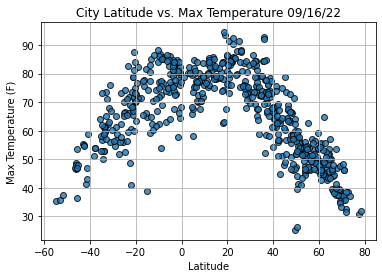

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

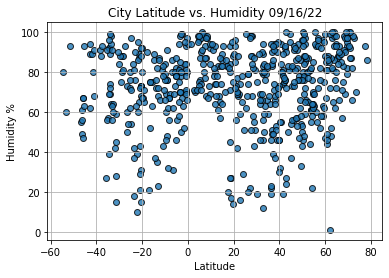

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

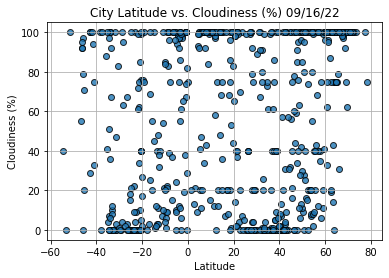

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

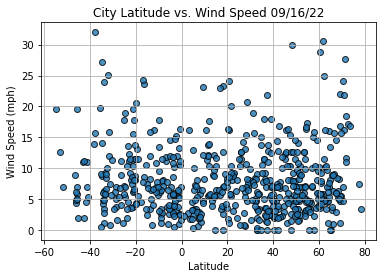

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Create a Linear Regression Function

In [8]:
# File to Load 
city_data = "weather_data/cities.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)


In [9]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

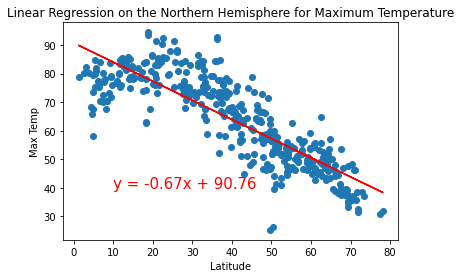

In [26]:
# Linear regression on the Northern Hemisphere:TEMPERATURE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

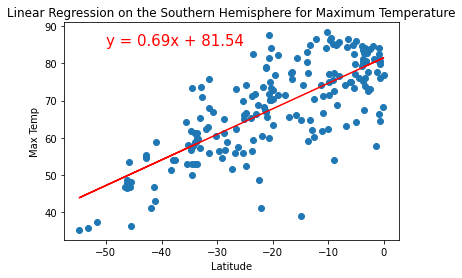

In [57]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

# Linear regression on the Northern Hemisphere: TEMPERATURE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50, 85))

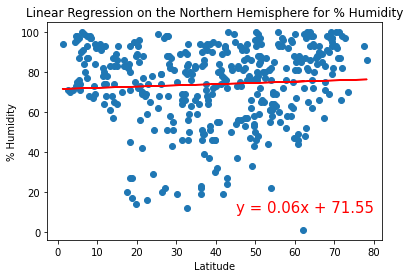

In [32]:
# Linear regression on the Northern Hemisphere: HUMIDITY
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,10))

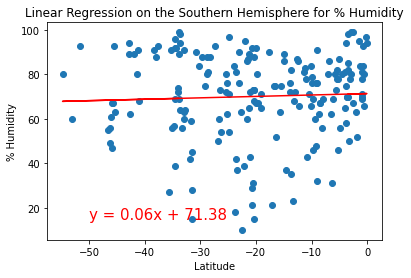

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

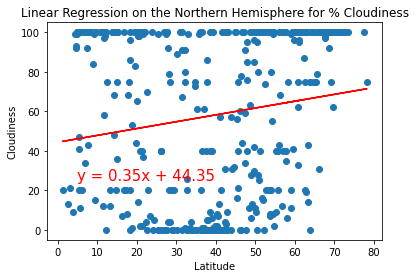

In [41]:
# Linear regression on the Northern Hemisphere: Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 'Cloudiness', (5,25))

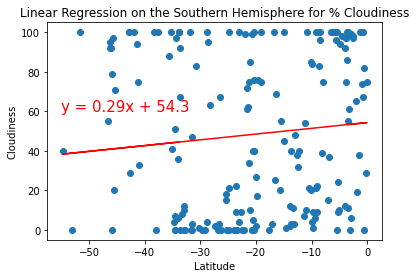

In [49]:
# Linear regression on the Northern Hemisphere: Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 'Cloudiness', (-55, 60))

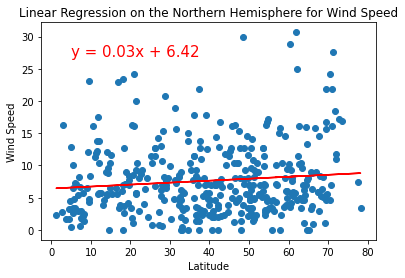

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(5, 27))

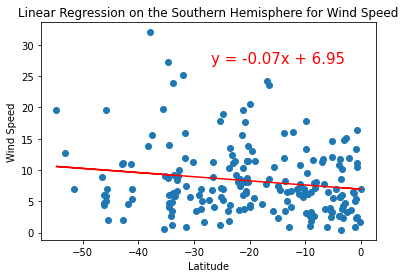

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-27,27))